### **Primer avance del proyecto, tecnicas de inteligencia artificial**

#### **Integrantes**

- Oscar Leonardo Riveros Perez

- Yovany Esneider Vargas Gutierrez

**Preproceso, adecuación de imagenes**

In [5]:
import cv2
from IPython.display import Image
import os
import numpy as np
import math
from matplotlib import pyplot as plt

Green_P = cv2.imread('Images/Green_P.jpg',1)
Green_G = cv2.imread('Images/Green_G.jpg',1)
Indoor_P = cv2.imread('Images/Indoor_P.jpg',1)
Indoor_G = cv2.imread('Images/Indoor_G.jpg',1)
Pattern_P = cv2.imread('Images/Pattern_P.jpg',1)
Pattern_G = cv2.imread('Images/Pattern_G.jpg',1)

#[:,:,::-1] -> Correccion para representar con matplotlib, ya que el arreglo de opencv esta en [B,G,R] y matplotlib [R,G,B]
Green_P, Green_G, Indoor_P, Indoor_G, Pattern_P, Pattern_G = Green_P[:,:,::-1],Green_G[:,:,::-1], Indoor_P[:,:,::-1], Indoor_G[:,:,::-1], Pattern_P[:,:,::-1], Pattern_G[:,:,::-1]

**Preproceso y adecuación de imagenes**

Antes de iniciar con 

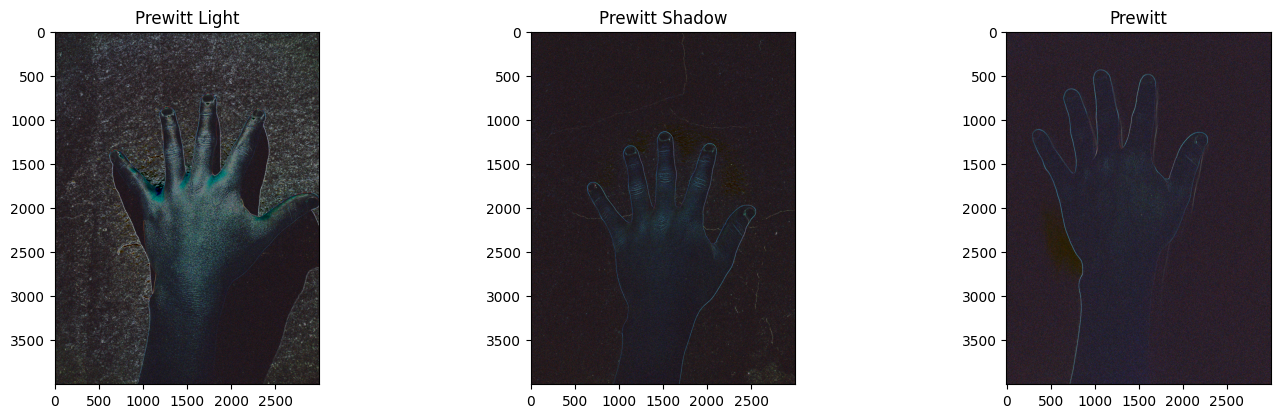

In [ ]:
def Prewitt_Filter(Img_In):
    Kernel_N=np.array([[-1,-1,-1],[1,-2,1],[1,1,1]])
    Kernel_S=np.array([[1,1,1],[1,-2,1],[-1,-1,-1]])
    Kernel_E=np.array([[1,1,-1],[1,-2,-1],[1,1,-1]])
    Kernel_O=np.array([[-1,1,1],[-1,-2,1],[-1,1,1]])

    Kernel_SO=np.array([[1,1,1],[-1,-2,1],[-1,-1,1]])   
    Kernel_NO=np.array([[-1,-1,1],[-1,-2,1],[1,1,1]])   
    Kernel_SE=np.array([[1,1,1],[1,-2,-1],[1,-1,-1]])   
    Kernel_NE=np.array([[1,-1,-1],[1,-2,-1],[1,1,1]])   

    Prewitt_N=cv2.filter2D(Img_In,-1,Kernel_N)
    Prewitt_S=cv2.filter2D(Img_In,-1,Kernel_S)
    Prewitt_E=cv2.filter2D(Img_In,-1,Kernel_E)
    Prewitt_O=cv2.filter2D(Img_In,-1,Kernel_O)

    Prewitt_SO=cv2.filter2D(Img_In,-1,Kernel_SO)
    Prewitt_NO=cv2.filter2D(Img_In,-1,Kernel_NO)
    Prewitt_SE=cv2.filter2D(Img_In,-1,Kernel_SE)
    Prewitt_NE=cv2.filter2D(Img_In,-1,Kernel_NE)

    return (Prewitt_N+Prewitt_S+Prewitt_E+Prewitt_O+Prewitt_SO+Prewitt_NO+Prewitt_SE+Prewitt_NE)

Prewitt_Light   =   Prewitt_Filter(Mano_light)
Prewitt_Shadow  =   Prewitt_Filter(Mano_shadow)
Prewitt         =   Prewitt_Filter(Mano)

# Muestra el filtro aplicado a imagenes en RGB

plt.figure(1)
plt.subplot(131), plt.imshow(Prewitt_Light), plt.title('Prewitt Light')
plt.subplot(132), plt.imshow(Prewitt_Shadow), plt.title('Prewitt Shadow')
plt.subplot(133), plt.imshow(Prewitt), plt.title('Prewitt')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=2, hspace=0, wspace=0.8)
plt.show()

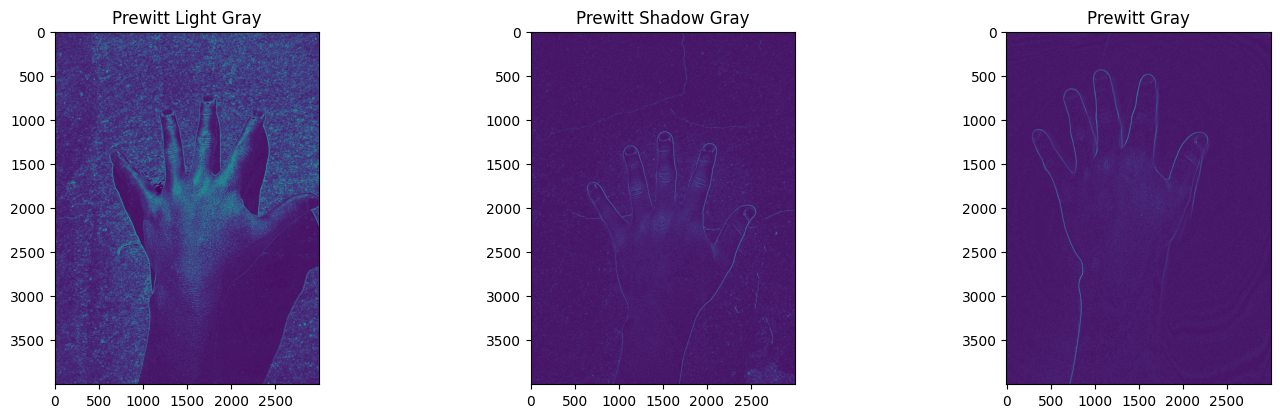

In [ ]:
Prewitt_Light_Gray   =   Prewitt_Filter(Mano_light_Gray)
Prewitt_Shadow_Gray  =   Prewitt_Filter(Mano_shadow_Gray)
Prewitt_Gray         =   Prewitt_Filter(Mano_Gray)

# Muestra el filtro aplicado a imagenes en escala de grises
plt.figure(1)
plt.subplot(131), plt.imshow(Prewitt_Light_Gray), plt.title('Prewitt Light Gray')
plt.subplot(132), plt.imshow(Prewitt_Shadow_Gray), plt.title('Prewitt Shadow Gray')
plt.subplot(133), plt.imshow(Prewitt_Gray), plt.title('Prewitt Gray')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=2, hspace=0, wspace=0.8)
plt.show()

El filtro Prewitt implementado, presenta un comportamiento sobresaliente en la imagen a la interperie con sombra. En contraste con la expuesta a la luz del sol, en pequeñas areas el filtro no es capaz de diferenciar entre un objeto y su sombra.

**2. Funciones vistas en el taller**

**2.1. Redimensionamiento**

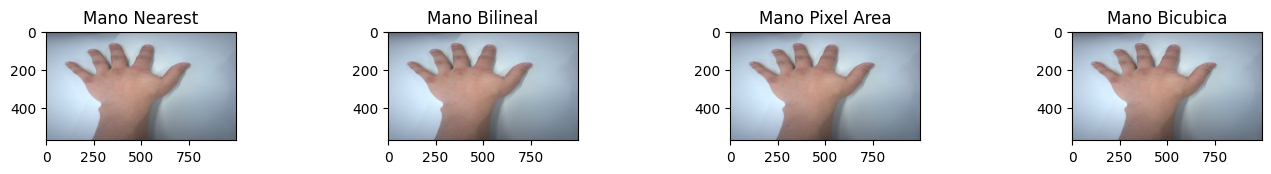

In [ ]:
H,W = Mano.shape[:2]
H_1=int(H/7)
W_1=int(W/3)

# Neares < Lineal < Area < Bicubic
Mano_Nearest    =   cv2.resize(Mano,(W_1,H_1),cv2.INTER_NEAREST)
Mano_Bilineal   =   cv2.resize(Mano,(W_1,H_1),cv2.INTER_LINEAR)
Mano_Pixel_Area =   cv2.resize(Mano,(W_1,H_1),cv2.INTER_AREA)
Mano_Bicubica   =   cv2.resize(Mano,(W_1,H_1),cv2.INTER_CUBIC)

plt.figure(1)
plt.subplot(141), plt.imshow(Mano_Nearest), plt.title('Mano Nearest')
plt.subplot(142), plt.imshow(Mano_Bilineal), plt.title('Mano Bilineal')
plt.subplot(143), plt.imshow(Mano_Pixel_Area), plt.title('Mano Pixel Area')
plt.subplot(144), plt.imshow(Mano_Bicubica), plt.title('Mano Bicubica')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=2, hspace=0, wspace=0.8)
plt.show()

Se observa un comportamiento ideal en las cuatro metodos de redimensionamiento con leves diferencias en los bordes, casi imperceptibles.

**2.2. Espacios de Color**

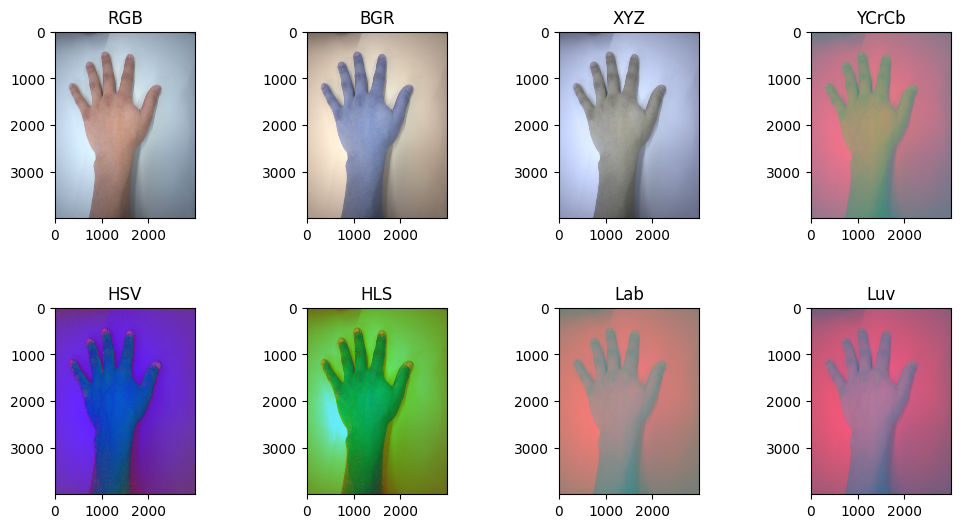

In [ ]:
Mano_BGR        =   cv2.cvtColor(Mano, cv2.COLOR_RGB2BGR)
Mano_XYZ        =   cv2.cvtColor(Mano, cv2.COLOR_RGB2XYZ)
Mano_YCrCb      =   cv2.cvtColor(Mano, cv2.COLOR_RGB2YCrCb)
Mano_HSV        =   cv2.cvtColor(Mano, cv2.COLOR_RGB2HSV)
Mano_HLS        =   cv2.cvtColor(Mano, cv2.COLOR_RGB2HLS)
Mano_LAB        =   cv2.cvtColor(Mano, cv2.COLOR_RGB2Lab)
Mano_LUV        =   cv2.cvtColor(Mano, cv2.COLOR_RGB2Luv)

plt.figure(1)
plt.subplot(241), plt.imshow(Mano), plt.title('RGB')
plt.subplot(242), plt.imshow(Mano_BGR), plt.title('BGR')
plt.subplot(243), plt.imshow(Mano_XYZ), plt.title('XYZ')
plt.subplot(244), plt.imshow(Mano_YCrCb), plt.title('YCrCb')
plt.subplot(245), plt.imshow(Mano_HSV), plt.title('HSV')
plt.subplot(246), plt.imshow(Mano_HLS), plt.title('HLS')
plt.subplot(247), plt.imshow(Mano_LAB), plt.title('Lab')
plt.subplot(248), plt.imshow(Mano_LUV), plt.title('Luv')

plt.subplots_adjust(top=1.2, bottom=0.05, left=0.10, right=1.5, hspace=0, wspace=0.8)
plt.show()

En los espacios de color BGR, HSV y HLS se observan areas que sobresalen por encima de otras como lo son las uñas y vasos sanguineos en HSV. Los demás presentan similitud en su distribución de colores.

**2.3. Umbralizacion**

**2.3.1. Umbralizacion Estática**

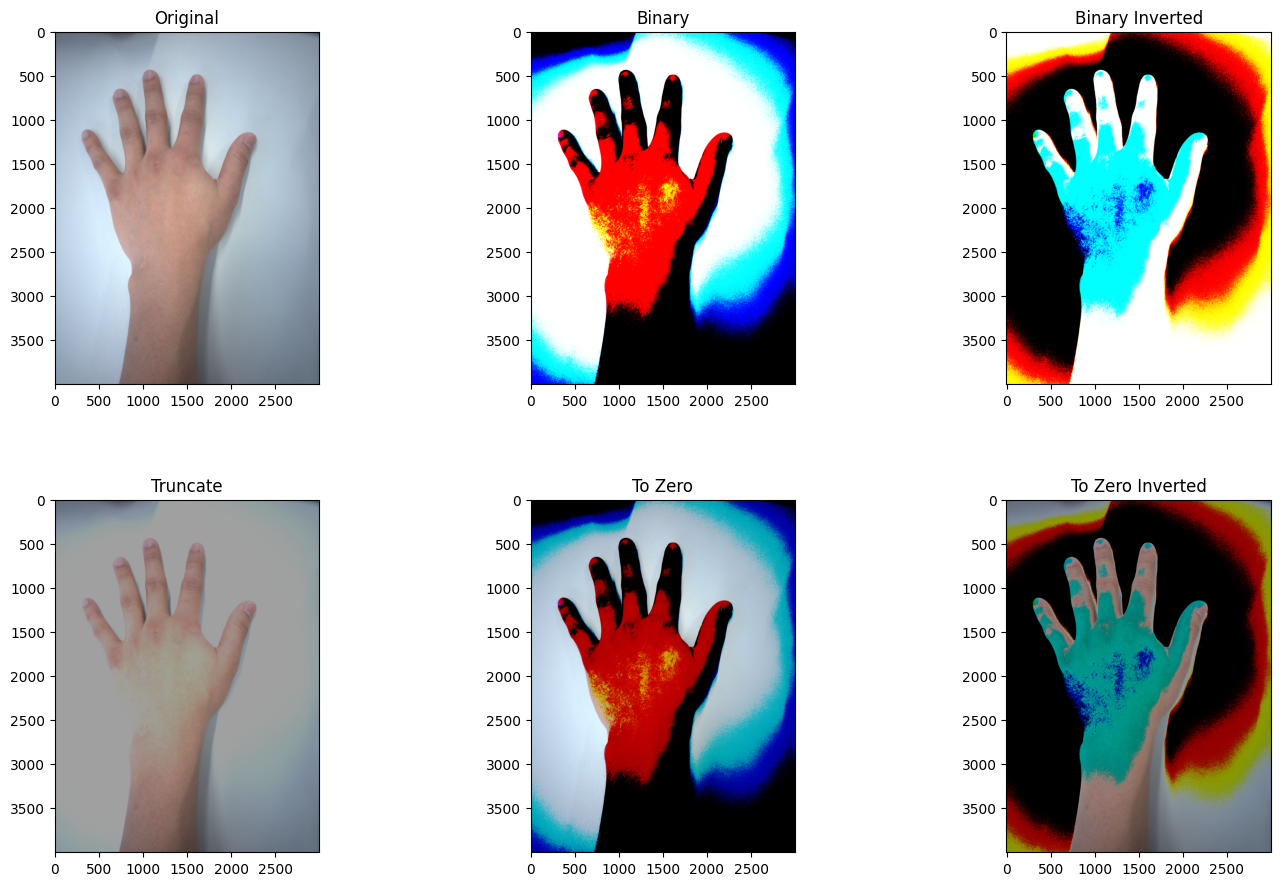

In [ ]:
Umbral=160
Max_Valor=255

Mano_Binary         =   cv2.threshold(Mano,Umbral,Max_Valor,cv2.THRESH_BINARY)
Mano_Binary_Inv     =   cv2.threshold(Mano,Umbral,Max_Valor,cv2.THRESH_BINARY_INV)
Mano_Truncate       =   cv2.threshold(Mano,Umbral,Max_Valor,cv2.THRESH_TRUNC)
Mano_To_Zero        =   cv2.threshold(Mano,Umbral,Max_Valor,cv2.THRESH_TOZERO)
Mano_To_Zero_Inv    =   cv2.threshold(Mano,Umbral,Max_Valor,cv2.THRESH_TOZERO_INV)

# Threshold aplicado a imagenes en RGB
plt.figure(1)
plt.subplot(231), plt.imshow(Mano, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(232), plt.imshow(Mano_Binary[1]), plt.title('Binary')
plt.subplot(233), plt.imshow(Mano_Binary_Inv[1]), plt.title('Binary Inverted')
plt.subplot(234), plt.imshow(Mano_Truncate[1]), plt.title('Truncate')
plt.subplot(235), plt.imshow(Mano_To_Zero[1]), plt.title('To Zero')
plt.subplot(236), plt.imshow(Mano_To_Zero_Inv[1]), plt.title('To Zero Inverted')

plt.subplots_adjust(top=2, bottom=0.05, left=0.10, right=2, hspace=0, wspace=0.8)
plt.show()

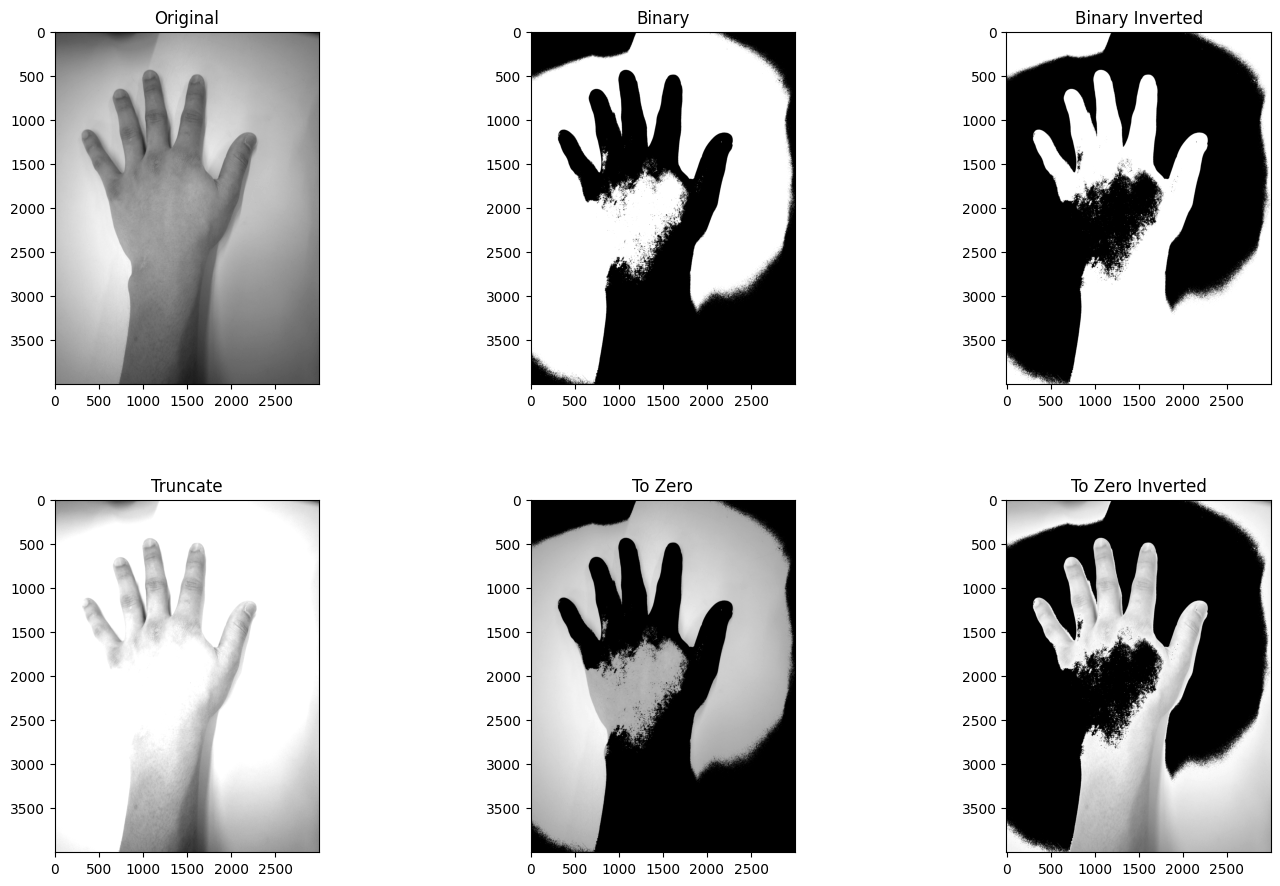

In [ ]:
Mano_Binary_Gray        =   cv2.threshold(Mano_Gray,Umbral,Max_Valor,cv2.THRESH_BINARY)
Mano_Binary_Inv_Gray    =   cv2.threshold(Mano_Gray,Umbral,Max_Valor,cv2.THRESH_BINARY_INV)
Mano_Truncate_Gray      =   cv2.threshold(Mano_Gray,Umbral,Max_Valor,cv2.THRESH_TRUNC)
Mano_To_Zero_Gray       =   cv2.threshold(Mano_Gray,Umbral,Max_Valor,cv2.THRESH_TOZERO)
Mano_To_Zero_Inv_Gray   =   cv2.threshold(Mano_Gray,Umbral,Max_Valor,cv2.THRESH_TOZERO_INV)

# Threshold aplicado a imagenes en escala de grises
plt.figure(1)
plt.subplot(231), plt.imshow(Mano_Gray, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(232), plt.imshow(Mano_Binary_Gray[1], cmap=plt.cm.gray), plt.title('Binary')
plt.subplot(233), plt.imshow(Mano_Binary_Inv_Gray[1], cmap=plt.cm.gray), plt.title('Binary Inverted')
plt.subplot(234), plt.imshow(Mano_Truncate_Gray[1], cmap=plt.cm.gray), plt.title('Truncate')
plt.subplot(235), plt.imshow(Mano_To_Zero_Gray[1], cmap=plt.cm.gray), plt.title('To Zero')
plt.subplot(236), plt.imshow(Mano_To_Zero_Inv_Gray[1], cmap=plt.cm.gray), plt.title('To Zero Inverted')

plt.subplots_adjust(top=2, bottom=0.05, left=0.10, right=2, hspace=0, wspace=0.8)
plt.show()

Como la umbralización estática presenta pasabandas como en el umbral binario y su negativo. También se observan areas limitando con la imagen original en los umbrales a cero, esto debido a sus picos en la naturaleza del filtro.

***2.3.2. Umbralizacion Adaptativa***

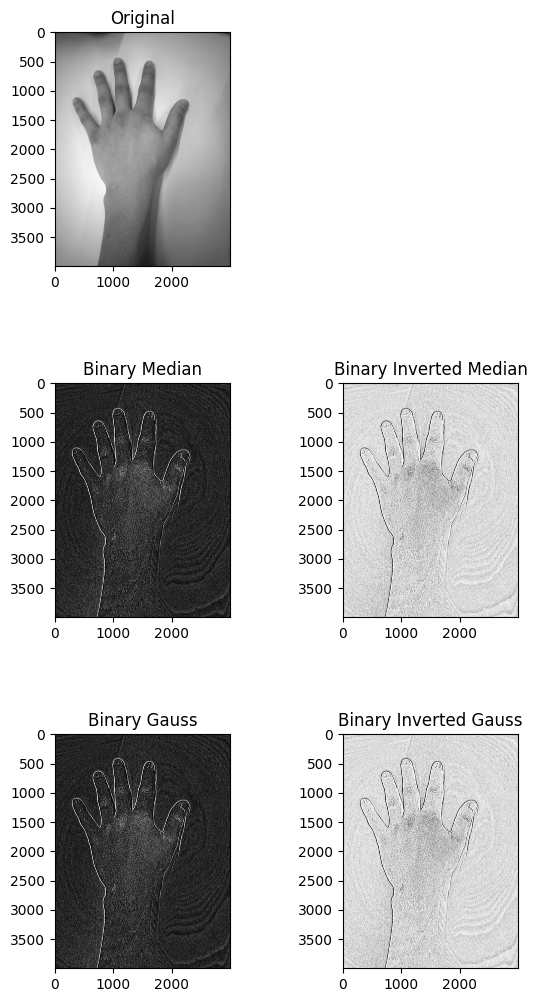

In [ ]:
Max_Valor=255
Block_Size=27
Tunning_Threshold=-1

# Metodo de umbral - Mediana - Escala de grises
Mano_ADP_Binary_Gray        =   cv2.adaptiveThreshold(Mano_Gray,Max_Valor,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY      ,Block_Size,Tunning_Threshold)
Mano_ADP_Binary_Inv_Gray    =   cv2.adaptiveThreshold(Mano_Gray,Max_Valor,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV  ,Block_Size,Tunning_Threshold)

# Metodo de umbral - Gaussiano - Escala de grises
Mano_ADP_Binary_Gray        =   cv2.adaptiveThreshold(Mano_Gray,Max_Valor,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY      ,Block_Size,Tunning_Threshold)
Mano_ADP_Binary_Inv_Gray    =   cv2.adaptiveThreshold(Mano_Gray,Max_Valor,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV  ,Block_Size,Tunning_Threshold)


# Threshold aplicado a imagenes en escala de grises
plt.figure(1)
plt.subplot(321), plt.imshow(Mano_Gray, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(323), plt.imshow(Mano_ADP_Binary_Gray, cmap=plt.cm.gray), plt.title('Binary Median')
plt.subplot(324), plt.imshow(Mano_ADP_Binary_Inv_Gray, cmap=plt.cm.gray), plt.title('Binary Inverted Median')
plt.subplot(325), plt.imshow(Mano_ADP_Binary_Gray, cmap=plt.cm.gray), plt.title('Binary Gauss')
plt.subplot(326), plt.imshow(Mano_ADP_Binary_Inv_Gray, cmap=plt.cm.gray), plt.title('Binary Inverted Gauss')

plt.subplots_adjust(top=2, bottom=0.05, left=0.10, right=1, hspace=0.5, wspace=0)
plt.show()

La diferencias entre ambos metodos, es imperceptible a simple vista. Sin embargo, cabe resaltar que al aplicar estos filtros se reconocen estructuras como las cicatrices, no presentes en los metodos anteriores.

**2.4. Filtros de Suavizado**

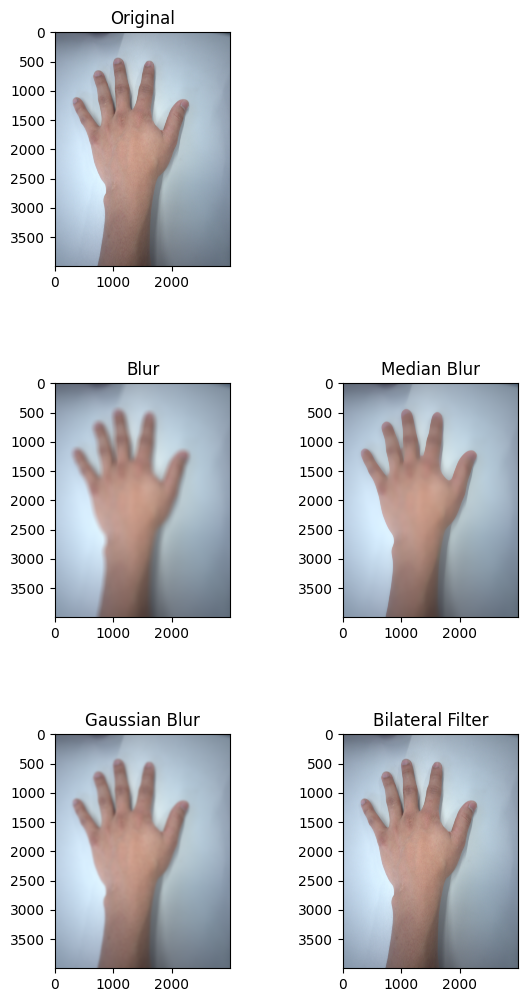

In [ ]:
Skernel=(101,101)
Std_x=0

Std_Color=0
Std_Space=0

Mano_Blur               =   cv2.blur(Mano,Skernel)
Mano_Median_Blur        =   cv2.medianBlur(Mano,Skernel[0])
Mano_Gaussian_Blur      =   cv2.GaussianBlur(Mano,Skernel,Std_x)
Mano_Bilateral_Filter   =   cv2.bilateralFilter(Mano,Skernel[0],Std_Color,Std_Space)

# Threshold aplicado a imagenes en escala de grises
plt.figure(1)
plt.subplot(321), plt.imshow(Mano), plt.title('Original')

plt.subplot(323), plt.imshow(Mano_Blur), plt.title('Blur')
plt.subplot(324), plt.imshow(Mano_Median_Blur), plt.title('Median Blur')
plt.subplot(325), plt.imshow(Mano_Gaussian_Blur), plt.title('Gaussian Blur')
plt.subplot(326), plt.imshow(Mano_Bilateral_Filter), plt.title('Bilateral Filter')

plt.subplots_adjust(top=2, bottom=0.05, left=0.10, right=1, hspace=0.5, wspace=0)
plt.show()


La diferencia entre los tipos de suvizado es muy marcada, donde el suavizado gaussiano conserva mejor los bordes.

**2.5. Filtros Derivativos**

In [ ]:
Dx=1
Dy=1
Ksize=3 #1,3,5,7

Low_Threshold=40
High_Threshold=90


Mano_Sobel_Light      =   cv2.Sobel(Mano_light,-1,Dx,Dy,Ksize)
Mano_Laplacian_Light  =   cv2.Laplacian(Mano_light,-1,Ksize)
Mano_Canny_Light      =   cv2.Canny(Mano_light,Low_Threshold,High_Threshold)

Mano_Sobel_Shadow      =   cv2.Sobel(Mano_shadow,-1,Dx,Dy,Ksize)
Mano_Laplacian_Shadow  =   cv2.Laplacian(Mano_shadow,-1,Ksize)
Mano_Canny_Shadow      =   cv2.Canny(Mano_shadow,Low_Threshold,High_Threshold)

Mano_Sobel_Indoor      =   cv2.Sobel(Mano,-1,Dx,Dy,Ksize)
Mano_Laplacian_Indoor  =   cv2.Laplacian(Mano,-1,Ksize)
Mano_Canny_Indoor      =   cv2.Canny(Mano,Low_Threshold,High_Threshold)

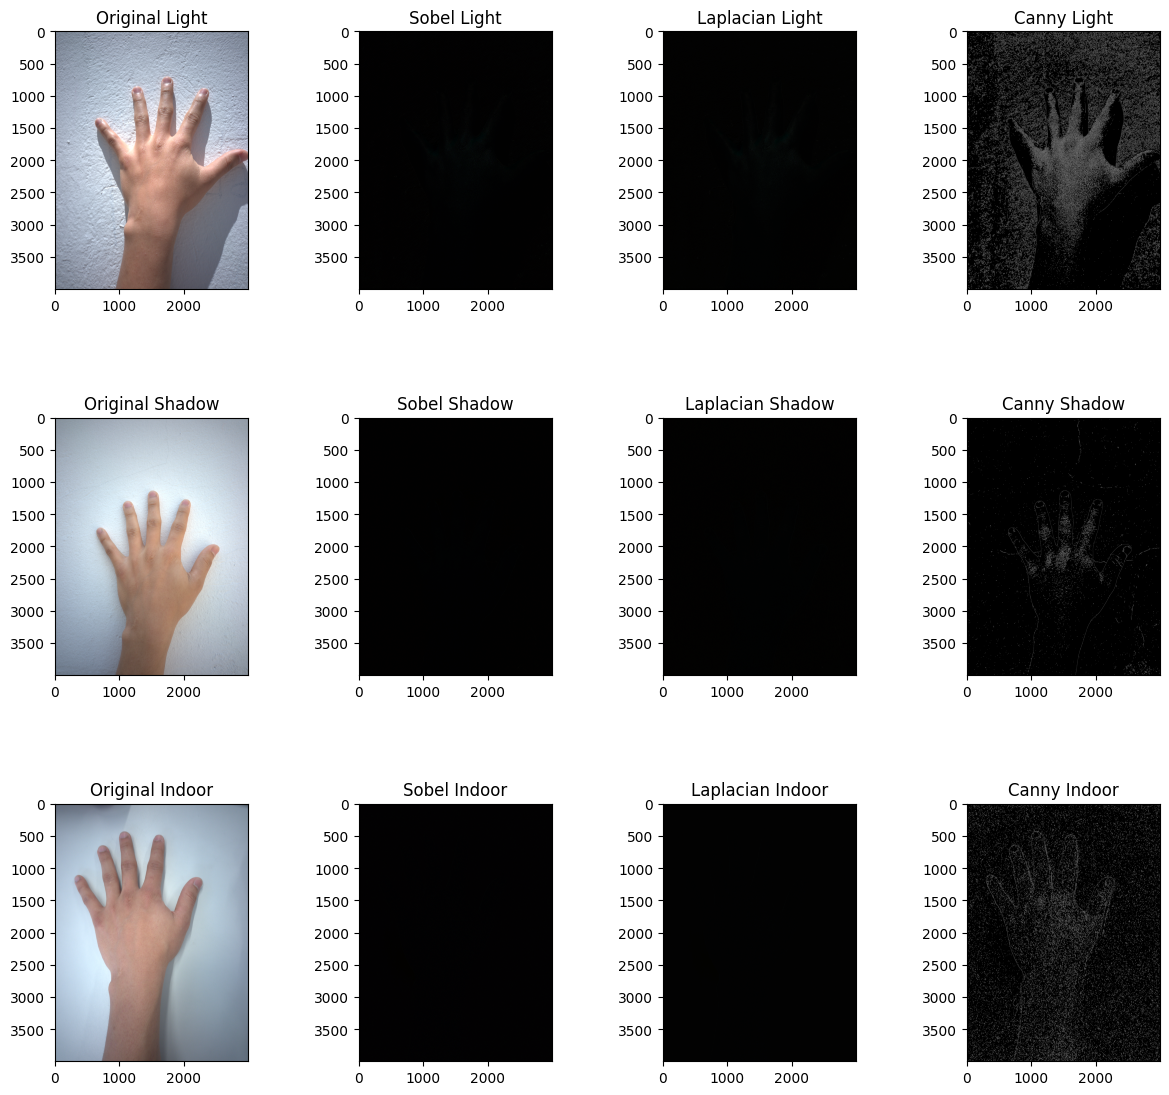

In [ ]:
# Threshold aplicado a imagenes en escala de grises
plt.figure(1)
plt.subplot(441), plt.imshow(Mano_light, cmap=plt.cm.gray), plt.title('Original Light')
plt.subplot(442), plt.imshow(Mano_Sobel_Light, cmap=plt.cm.gray), plt.title('Sobel Light')
plt.subplot(443), plt.imshow(Mano_Laplacian_Light, cmap=plt.cm.gray), plt.title('Laplacian Light')
plt.subplot(444), plt.imshow(Mano_Canny_Light, cmap=plt.cm.gray), plt.title('Canny Light')
plt.subplot(445), plt.imshow(Mano_shadow, cmap=plt.cm.gray), plt.title('Original Shadow')
plt.subplot(446), plt.imshow(Mano_Sobel_Shadow, cmap=plt.cm.gray), plt.title('Sobel Shadow')
plt.subplot(447), plt.imshow(Mano_Laplacian_Shadow, cmap=plt.cm.gray), plt.title('Laplacian Shadow')
plt.subplot(448), plt.imshow(Mano_Canny_Shadow, cmap=plt.cm.gray), plt.title('Canny Shadow')
plt.subplot(449), plt.imshow(Mano, cmap=plt.cm.gray), plt.title('Original Indoor')
plt.subplot(4,4,10), plt.imshow(Mano_Sobel_Indoor, cmap=plt.cm.gray), plt.title('Sobel Indoor')
plt.subplot(4,4,11), plt.imshow(Mano_Laplacian_Indoor, cmap=plt.cm.gray), plt.title('Laplacian Indoor')
plt.subplot(4,4,12), plt.imshow(Mano_Canny_Indoor, cmap=plt.cm.gray), plt.title('Canny Indoor')

plt.subplots_adjust(top=3, bottom=0.05, left=0.10, right=2, hspace=0.5, wspace=0)
plt.show()

A diferencia de la teoria impuesta bajo los filtros derivativos, que indica la obtención de los contornos a simple vista, en este caso son muy delgados. También a menos iluminación natural la imagen en Sobel y Laplaciano se atenua mucho al negro absoluto.